In [2]:
#Import Labraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df=pd.read_csv('/content/kaggle_survey_2021_responses.csv')
df.head()

/tmp/ipython-input-1635248868.py:1: DtypeWarning: Columns (0,18,32,49,56,69,88,100,107,113,139,184,195,201,202,253,266,278,283,285,286,287,288,289,290,291,292,301,322,339,347,355,367) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/kaggle_survey_2021_responses.csv')


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#Dataset Overview:
print('check number of row & columns:\n',df.shape)
print('check for column in dataset:\n',df.columns)
print('Check for information in dataset:\n',df.info())
print('Check for statistics summary in dataset for all columns:\n',df.describe())

check number of row & columns:
 (25974, 369)
check for column in dataset:
 Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q38_B_Part_3', 'Q38_B_Part_4', 'Q38_B_Part_5', 'Q38_B_Part_6',
       'Q38_B_Part_7', 'Q38_B_Part_8', 'Q38_B_Part_9', 'Q38_B_Part_10',
       'Q38_B_Part_11', 'Q38_B_OTHER'],
      dtype='object', length=369)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25974 entries, 0 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: object(369)
memory usage: 73.1+ MB
Check for information in dataset:
 None
Check for statistics summary in dataset for all columns:
         Time from Start to Finish (seconds)     Q1     Q2     Q3  \
count                                 25974  25974  25974  25974   
unique                                 5410     12      6     67   
top                                     484  25-29    Man  India   
freq   

In [24]:
# Data Cleaning
df.dropna(how='all', inplace=True)
df.drop_duplicates(inplace=True)

# Check missing values
missing = df.isnull().sum().sort_values(ascending=False)
print(missing[missing > 0])


Q36_B_Part_7     25973
Q10_Part_16      25973
Q34_B_Part_16    25973
Q7_Part_12       25973
Q9_Part_12       25973
                 ...  
Q7_Part_1         4113
Q15               2219
Q13               1570
Q11               1512
Q8                1144
Length: 362, dtype: int64


In [25]:
#label Encoding and Mapping:
# Example: Map Gender column to numeric values
df['Q2'] = df['Q2'].map({
    'Man': 0,
    'Woman': 1,
    'Nonbinary': 2,
    'Prefer not to say': 3,
    'Prefer to self-describe': 4
})

# Example: Education level label encoding
edu_order = {
    "I prefer not to answer": 0,
    "No formal education": 1,
    "Some college/university": 2,
    "Bachelor’s degree": 3,
    "Master’s degree": 4,
    "Doctoral degree": 5
}
df['Q4'] = df['Q4'].map(edu_order)



In [26]:
#Extrct insight:
#What's most common programming language:
lang_cols = [col for col in df.columns if 'Q7_Part' in col]
languages = df[lang_cols].apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False)
print(languages.head(5))

Python    21860.0
SQL       10756.0
C++        5535.0
R          5334.0
Java       4769.0
dtype: float64


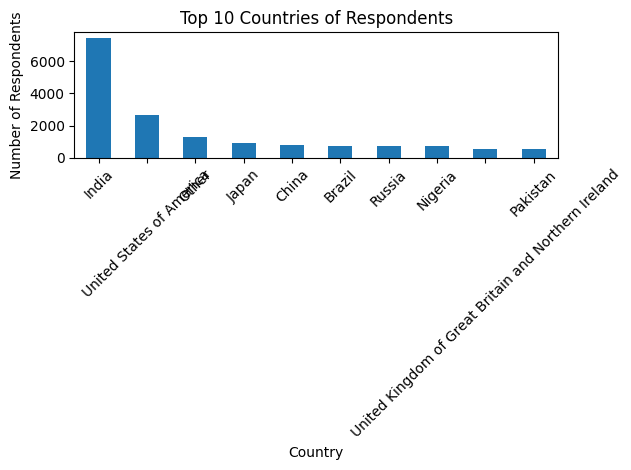

In [27]:
df['Q3'].value_counts().head(10).plot(kind='bar', title="Top 10 Countries of Respondents")
plt.xlabel("Country")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
